# Network analysis of the data.
The goal of this notebook is to uncover several constructions inside the dataset which may help us to uncover fraud. With that, we can see whether we can create features related to connections inside the network.
In this network analysis, we see if we can use the connections an account has in order to predict behavior. We will build a graph with the following properties:
- Every account is a node (internal and external)
- Every transaction is an edge.  

Once we have this, we can see if we can use different graph properties to see whether or not an account is suspicious of unwanted behaviour.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#### Load data.

In [3]:
client_info = pd.read_csv('data/client_info.csv')
demographic_info = pd.read_csv('data/demographic_data.csv')
transaction_info = pd.read_csv('data/transction_info.csv')
order_info = pd.read_csv('data/order_info.csv')

#### Creata a unique bank account (bank + account)

In [4]:
transaction_info['bank_account'] = transaction_info['bank'] + transaction_info['account'].map(str)

#### Build the graph.
We initiate the graph, add the nodes from the internal account id and the non-zero external accounts.

In [5]:
G = nx.Graph()
G.add_nodes_from(transaction_info['account_id'].unique().tolist())
G.add_nodes_from(transaction_info['bank_account'][transaction_info['bank_account'].notnull()].unique())

#### Add non-empty edges.

In [6]:
nonEmpty = transaction_info[transaction_info['bank_account'].notnull()]
edges = zip(nonEmpty['account_id'],nonEmpty['bank_account'], nonEmpty['amount'])
G.add_weighted_edges_from(edges)

#### Look at the largest connected components.
A connected component is a cluster of nodes who are connected by an edge. This can uncover certain structures of possible unwanted behavor. 

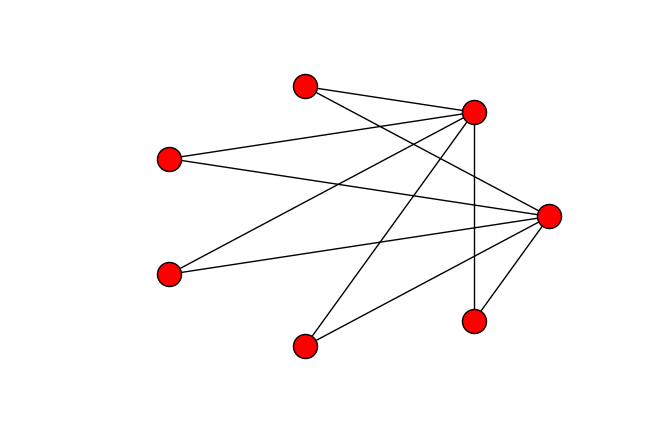

In [7]:
giant = max(nx.connected_component_subgraphs(G), key=len)
nx.draw_circular(giant)

#### Look at it in a directed graph.

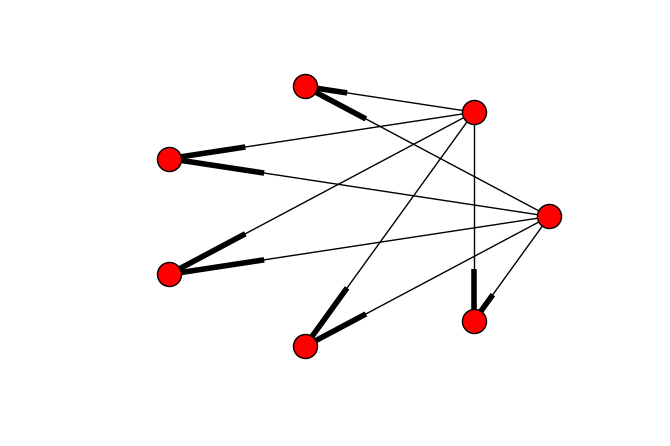

In [8]:
Gdi = nx.DiGraph()
Gdi.add_nodes_from(giant.nodes())
Gdi.add_edges_from(giant.edges())
nx.draw_circular(Gdi)

Unfortunatly, we see that our datastet has no internal transactions (or we do not have the required mapping). Therefore a network analysis will not help us any further.  
A different dataset which does have this mapping is hard to find. Internally, banks do have these but due to prviacy constraints these are never made pulic. We could also use Bitcoin transactions but a crypto currency won't provide us with any other features. Hence, we will abandon the network analysis for now.